In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
import numpy as np
from matplotlib.animation import FuncAnimation


In [44]:
data = pd.read_csv("example.txt")
data

,theta,xi,yi,xc,yc,xo,yo,xb,yb,xct,yct,xot,yot
0,1.3708,0.0,0.0,0.1987,0.9801,0.3416,1.1200,1.0,0.2,-0.0113,1.1943,-0.0769,1.6900
1,1.3718,0.0,0.0,0.1977,0.9803,0.3411,1.1197,1.0,0.2,-0.0114,1.1953,-0.0753,1.6912
2,1.3727,0.0,0.0,0.1968,0.9805,0.3406,1.1194,1.0,0.2,-0.0116,1.1963,-0.0736,1.6924
3,1.3737,0.0,0.0,0.1958,0.9806,0.3402,1.1190,1.0,0.2,-0.0118,1.1972,-0.0720,1.6936
4,1.3747,0.0,0.0,0.1948,0.9808,0.3397,1.1187,1.0,0.2,-0.0120,1.1982,-0.0703,1.6948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1.6317,0.0,0.0,-0.0609,0.9981,0.1177,0.9083,1.0,0.2,0.0739,1.2661,0.5217,1.4886
262,1.6327,0.0,0.0,-0.0619,0.9981,0.1150,0.9049,1.0,0.2,0.0779,1.2635,0.5298,1.4776
263,1.6337,0.0,0.0,-0.0629,0.9980,0.1120,0.9010,1.0,0.2,0.0825,1.2604,0.5389,1.4648
264,1.6347,0.0,0.0,-0.0639,0.9980,0.1085,0.8966,1.0,0.2,0.0882,1.2565,0.5496,1.4492


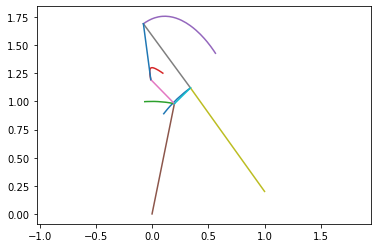

In [52]:
%matplotlib inline
plt.clf()
plt.axis('equal')

plt.plot(data["xo"],data["yo"])
plt.plot(data["xi"],data["yi"])
plt.plot(data["xc"],data["yc"])
plt.plot(data["xct"],data["yct"])
plt.plot(data["xot"],data["yot"])
crank_link = plt.plot([data["xi"][0],data["xc"][0]],[data["yi"][0],data["yc"][0]])
crank_header_link = plt.plot([data["xc"][0],data["xct"][0]],[data["yc"][0],data["yct"][0]])
output_header_link = plt.plot([data["xo"][0],data["xot"][0]],[data["yo"][0],data["yot"][0]])
output_link = plt.plot([data["xo"][0],data["xb"][0]],[data["yo"][0],data["yb"][0]])
coupler_link = plt.plot([data["xo"][0],data["xc"][0]],[data["yo"][0],data["yc"][0]])
coupler_top_link = plt.plot([data["xot"][0],data["xct"][0]],[data["yot"][0],data["yct"][0]])
plt.show()

In [46]:
def get_length(in_data,xlabel1,xlabel2,ylabel1,ylabel2):
   return np.sqrt(
       np.power(in_data[xlabel1] - in_data[xlabel2], 2) + 
       np.power(in_data[ylabel1] - in_data[ylabel2], 2))
    
    
def check_for_lengths(in_data):
    pairs = [
        ["xi","xc","yi","yc"],
        ["xc","xct","yc","yct"],
        ["xo","xot","yo","yot"],
        ["xo","xb","yo","yb"],
        ["xo","xc","yo","yc"],
        ["xot","xct","yot","yct"]
    ]
    for pair in pairs:
        print(get_length(data,pair[0],pair[1],pair[2],pair[3]).describe())
        
    
check_for_lengths(data)

count    266.000000
mean       1.000001
std        0.000029
min        0.999948
25%        0.999980
50%        1.000003
75%        1.000024
max        1.000055
dtype: float64
count    266.000000
mean       0.299995
std        0.000042
min        0.299900
25%        0.299970
50%        0.299995
75%        0.300019
max        0.300109
dtype: float64
count    266.000000
mean       0.707108
std        0.000039
min        0.707002
25%        0.707083
50%        0.707109
75%        0.707134
max        0.707201
dtype: float64
count    266.000000
mean       1.131372
std        0.000028
min        1.131315
25%        1.131352
50%        1.131373
75%        1.131392
max        1.131436
dtype: float64
count    266.000000
mean       0.200009
std        0.000044
min        0.199882
25%        0.199979
50%        0.200013
75%        0.200039
max        0.200100
dtype: float64
count    266.000000
mean       0.500004
std        0.000039
min        0.499907
25%        0.499976
50%        0.500006
75%  

In [51]:
plt.clf()
Figure = plt.figure()
plt.axis('equal')


# creating a plot
#plt.plot(data["xo"],data["yo"])
#plt.plot(data["xi"],data["yi"])
#plt.plot(data["xc"],data["yc"])
#plt.plot(data["xct"],data["yct"])
#plt.plot(data["xot"],data["yot"])
crank_link = plt.plot([data["xi"][0],data["xc"][0]],[data["yi"][0],data["yc"][0]])[0]
crank_header_link = plt.plot([data["xc"][0],data["xct"][0]],[data["yc"][0],data["yct"][0]])[0]
output_header_link = plt.plot([data["xo"][0],data["xot"][0]],[data["yo"][0],data["yot"][0]])[0]
output_link = plt.plot([data["xo"][0],data["xb"][0]],[data["yo"][0],data["yb"][0]])[0]
coupler_link = plt.plot([data["xo"][0],data["xc"][0]],[data["yo"][0],data["yc"][0]])[0]
coupler_top_link = plt.plot([data["xot"][0],data["xct"][0]],[data["yot"][0],data["yct"][0]])[0]

 


# function takes frame as an input
def AnimationFunction(frame):
    crank_link.set_data(([data["xi"][frame],data["xc"][frame]],[data["yi"][frame],data["yc"][frame]]))
    crank_header_link.set_data(([data["xc"][frame],data["xct"][frame]],[data["yc"][frame],data["yct"][frame]]))
    output_header_link.set_data(([data["xo"][frame],data["xot"][frame]],[data["yo"][frame],data["yot"][frame]]))
    output_link.set_data(([data["xo"][frame],data["xb"][frame]],[data["yo"][frame],data["yb"][frame]]))
    coupler_link.set_data(([data["xo"][frame],data["xc"][frame]],[data["yo"][frame],data["yc"][frame]]))
    coupler_top_link.set_data(([data["xot"][frame],data["xct"][frame]],[data["yot"][frame],data["yct"][frame]]))
    

anim_created = FuncAnimation(Figure, AnimationFunction, frames=len(data), interval=30)

video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
 
# good practice to close the plt object.
plt.close()

<Figure size 432x288 with 0 Axes>

In [54]:
len(data)

900

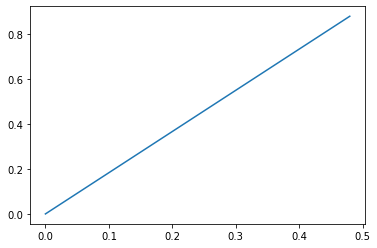

In [56]:
print(plt.plot([data["xi"][0],data["xc"][0]],[data["yi"][0],data["yc"][0]]))